In [3]:
import math as m
import numpy as np
import matplotlib.pyplot as plt
from math import *

In [4]:
G = 6.67e-8
g = 4.0/3.0
k = 1.244e15*(0.5**g)

def rk2(n):
    o_r = 2.0e8
    dr = o_r/n
    
    # Set up variables
    
    r = np.zeros(n)
    rho = np.zeros(n)
    mass = np.zeros(n)
    press = np.zeros(n)
    
    # Set up central values (initial values)
    
    r[0] = 0
    rho[0] = 10.0e10
    mass[0] = 0.0
    press[0] = k*rho[0]**g
    press_c = 10.0e-10*press[0]

    for i in range(1,n):
    
        r[i] = dr * i
        
        k1_m = dr * 4.0*pi*r[i]**2 * (press[i-1]/k)**(1/g)                ## Defino la correccion de la masa
        k1_p = -(G*mass[i-1]/(r[i]**2))*((press[i-1]/k)**(1/g)) * dr      ## Defino la correccion de la Presion
                        
       
    
        k2_m = dr * 4.0*pi*(r[i]+(dr/2))**2 * ((press[i-1]+(k1_p/2))/k)**(1/g) 
        k2_p = -G*(mass[i-1]+(k1_m/2))/(r[i]+(dr/2))**2 * ((press[i-1]+(k1_p/2))/k)**(1/g) * dr
      
    
        mass[i] = mass[i-1] + k2_m
        press[i] = press[i-1] + k2_p
        rho[i] = (press[i]/k)**(1/g)
        
        if press[i] < press_c:
           break
        
    return(r,rho,mass,press)

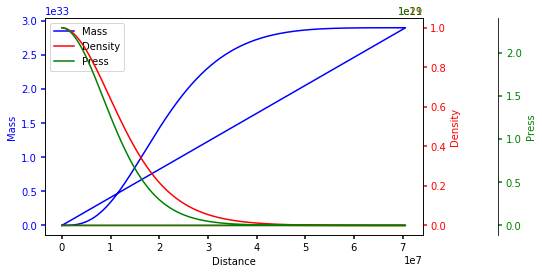

In [6]:
def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)


fig, host = plt.subplots()
fig.subplots_adjust(right=1)

par1 = host.twinx()
par2 = host.twinx()

# Offset the right spine of par2.  The ticks and label have already been
# placed on the right by twinx above.
par2.spines["right"].set_position(("axes", 1.2))
# Having been created by twinx, par2 has its frame off, so the line of its
# detached spine is invisible.  First, activate the frame but make the patch
# and spines invisible.
make_patch_spines_invisible(par2)
# Second, show the right spine.
par2.spines["right"].set_visible(True)

p1, = host.plot(rk2(1000)[0],rk2(1000)[2], "b-", label="Mass")
p2, = par1.plot(rk2(1000)[0],rk2(1000)[1] , "r-", label="Density")
p3, = par2.plot(rk2(1000)[0],rk2(1000)[3] , "g-", label="Press")


host.set_xlabel("Distance")
host.set_ylabel("Mass")
par1.set_ylabel("Density")
par2.set_ylabel("Press")

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())

tkw = dict(size=4, width=1.5)
host.tick_params(axis='y', colors=p1.get_color(), **tkw)
par1.tick_params(axis='y', colors=p2.get_color(), **tkw)
par2.tick_params(axis='y', colors=p3.get_color(), **tkw)
host.tick_params(axis='x', **tkw)

lines = [p1, p2, p3]

host.legend(lines, [l.get_label() for l in lines])

plt.show()